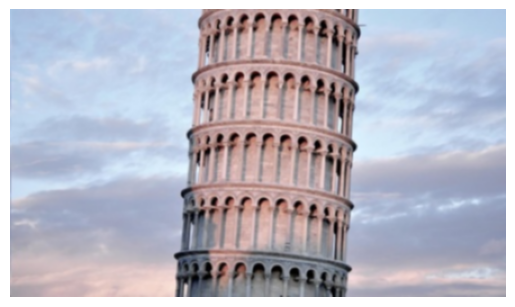

In [4]:
import cv2
import matplotlib.pyplot as plt

def apply_blur(image, blur_value):
    # Kiểm tra nếu ảnh đầu vào có hợp lệ không
    if image is None:
        print("Lỗi: Không tìm thấy hoặc không thể tải ảnh")
        return

    # Chuyển đổi giá trị blur thành giá trị kernel
    kernel_size = max(1, int((blur_value / 100) * 20) + 1)  # Ensure it's odd
    if kernel_size % 2 == 0:
        kernel_size += 1

    # Áp dụng làm mờ Gaussian
    img_blur = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

    # Hiện ảnh
    plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis
    plt.show()

# Test
image = cv2.imread("./Artistic/data/inp_images/tower.jpeg")
apply_blur(image, 5)

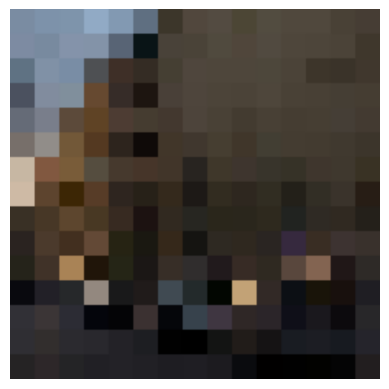

In [5]:
import cv2
import matplotlib.pyplot as plt

def apply_pixelate(image, pixelate_value):
    # Kiểm tra nếu ảnh đầu vào có hợp lệ không
    if image is None:
        print("Lỗi: Không tìm thấy hoặc không thể tải ảnh")
        return

    # Điều chỉnh giá trị về khoảng 1-20
    pixelate_value = max(1, min(pixelate_value, 20))

    # Calculate the scaling factor based on the pixelate value
    # Scale factor calculation: higher pixelate_value means bigger blocks
    scale_factor = pixelate_value  # Directly use pixelate_value for scaling

    # Resize to smaller dimensions
    small_image = cv2.resize(image, (image.shape[1] // scale_factor, image.shape[0] // scale_factor), interpolation=cv2.INTER_LINEAR)
    
    # Resize back to original dimensions
    pixelated_image = cv2.resize(small_image, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Display the pixelated image
    plt.imshow(cv2.cvtColor(pixelated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Test
input_image = cv2.imread("./Images/color/0.jpg")
apply_pixelate(input_image, 10)


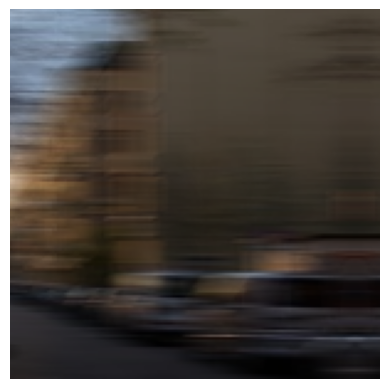

In [6]:
# loading library
import cv2
import numpy as np

def apply_motion_blur(img, distance=30, angle=45, fade=50):
    # Kiểm tra nếu ảnh đầu vào có hợp lệ không
    if img is None:
        print("Lỗi: Không tìm thấy hoặc không thể tải ảnh")
        return
    
    # Giới hạn giá trị distance, angle và fade
    distance = max(1, min(distance, 100))
    angle = max(0, min(angle, 180))
    fade = max(0, min(fade, 100)) / 100.0  # Fade là một tỷ lệ (0-1)

    # Tạo kernel cho hiệu ứng motion blur
    kernel_size = distance
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)

    # Tính toán tọa độ trung tâm của kernel
    center = kernel_size // 2

    # Tạo vector cho góc
    radians = np.deg2rad(angle)
    dx = int(np.cos(radians) * center)
    dy = int(np.sin(radians) * center)

    # Tạo đường mờ dọc theo hướng góc
    for i in range(kernel_size):
        x = center + int(i * dx / distance)
        y = center + int(i * dy / distance)
        kernel[y, x] = 1 - (i / kernel_size) * fade  # Giảm dần độ mạnh của mờ theo fade

    # Chuẩn hóa kernel
    kernel /= kernel.sum()

    # Áp dụng hiệu ứng motion blur
    blurred_image = cv2.filter2D(img, -1, kernel)

    # Hiện kết quả ảnh
    plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


# Test
input_image = cv2.imread("./Images/color/0.jpg")
apply_motion_blur(input_image, distance=40, angle=0, fade=0)